**Objectives**:
1. Which features are best predictors of a malign or benign tumour
2. Predict type of tumour

In [47]:
import pandas as pd
import numpy as np
from sklearn import datasets
#feature selection
from sklearn.feature_selection import RFE
#prediction
from sklearn.linear_model import LogisticRegression

data = pd.read_csv("data.csv")

In [48]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [49]:
data.shape

(569, 33)

**1. Feature selection**

In [50]:
#Change diagnosis to 0 or 1, M - 1, B - 0
mapper = {"M":1,"B":0}
data["diagnosis"] = data["diagnosis"].map(mapper)


In [51]:
data["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [52]:
data.columns.values
#drop "Unnamed: 32"
clean_data = data.drop(columns=["Unnamed: 32"],inplace=False)
#drop "id"
clean_data = clean_data.drop(columns=["id"],inplace=False)

In [53]:
clean_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
#define X and Y for prediction
X = clean_data.drop(columns=["diagnosis"]) #X - factors
Y = clean_data["diagnosis"]#Y - diagnosis

In [55]:
logistic = LogisticRegression()
most_important_characteristics = 10

rfe = RFE(logistic, most_important_characteristics,step=1)
# X needs scaling
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [56]:
rfe = rfe.fit(X_scaled,Y)

In [57]:
rfe.support_

array([False, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True,  True,  True, False, False,  True,
        True, False, False])

In [58]:
rfe.ranking_

array([ 7,  9, 10,  3, 18,  5,  8,  1, 20, 14,  1, 17,  4,  1, 16,  1, 19,
       12, 15, 11,  1,  1,  1,  1,  2, 21,  1,  1,  6, 13])

In [59]:
predictors = pd.Series(rfe.ranking_,index=X.columns,).sort_values(ascending=True)

In [60]:
characteristcs[:9] # 10 best

radius_se               1
texture_worst           1
perimeter_worst         1
compactness_se          1
area_se                 1
area_worst              1
concavity_worst         1
radius_worst            1
concave points_worst    1
dtype: int64

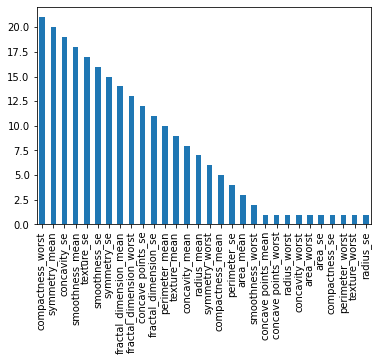

In [61]:
pd.Series(rfe.ranking_,index=X.columns).sort_values(ascending=False).plot(kind="bar")

In [62]:
X_model = pd.DataFrame(X_scaled,columns=X.columns).loc[:,rfe.support_]

In [63]:
import statsmodels.api as sm

**2. Prediction**

In [64]:
logit_model = sm.Logit(Y,X_model) 

In [65]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.058889
         Iterations 11


In [66]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      559
Method:                           MLE   Df Model:                            9
Date:                Thu, 27 Aug 2020   Pseudo R-squ.:                  0.9108
Time:                        14:20:26   Log-Likelihood:                -33.508
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.541e-141
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
concave points_mean      1.1601      1.193      0.972      0.331      -1.179       3.499
radius_se                0.9666      3.572      0.271      0.787      -6.034       7.968
area_se                  4.7235      6.936      0.681      0.496      -8.871      18.318
compactness_se          -1.6775      0.518     -3.238      0.001      -2.693      -0.662
radius_worst             3.9414      6.089      0.647      0.517      -7.993      15.876
texture_worst            2.0580      0.437      4.711      0.000       1.202       2.914
perimeter_worst         -0.5071      3.893     -0.130      0.896      -8.137       7.123
area_worst               1.1366      7.155      0.159      0.874     -12.887      15.161
concavity_worst          2.0346      0.848      2.401      0.016       0.373       3.696
concave points_worst     3.3861      1.434      2.361      0.018       0.575       6.197
========================================================================================

Possibly complete quasi-separation: A fraction 0.55 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
train, test = train_test_split(clean_data,test_size = 0.3,shuffle=True)

In [69]:
print(len(train))

398


In [70]:
print(len(test))

171


In [71]:
X_train = train.drop(columns=["diagnosis"])
X_test = test.drop(columns=["diagnosis"])

Y_train = train["diagnosis"]
Y_test = test["diagnosis"]

In [72]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
logit = LogisticRegression() #binary classification

In [74]:
logit.fit(X_train_scaled,Y_train) #aprendizaje con X_train e Y_train

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
predictions = logit.predict(X_test_scaled)

In [77]:
accuracy_score(Y_test,predictions)

0.9707602339181286

In [78]:
# Print a classification report
from sklearn import metrics
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       106
           1       0.95      0.97      0.96        65

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

